In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


In [5]:
try:
    boston =fetch_openml(name='boston', version=1, as_frame=True)
    df = boston.frame
    print("Boston Housing dataset loaded from OpenML.")
except Exception as e:
    print(f"無法下載的原因:{e}")
        

Boston Housing dataset loaded from OpenML.


In [6]:
df['MEDV'] = boston.target
print(boston.target_names[0])
print(df.head())
print(df.info())
print(df.describe())#統計查詢
print(df.isnull().sum())#檢查資料清洗

MEDV
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-nul

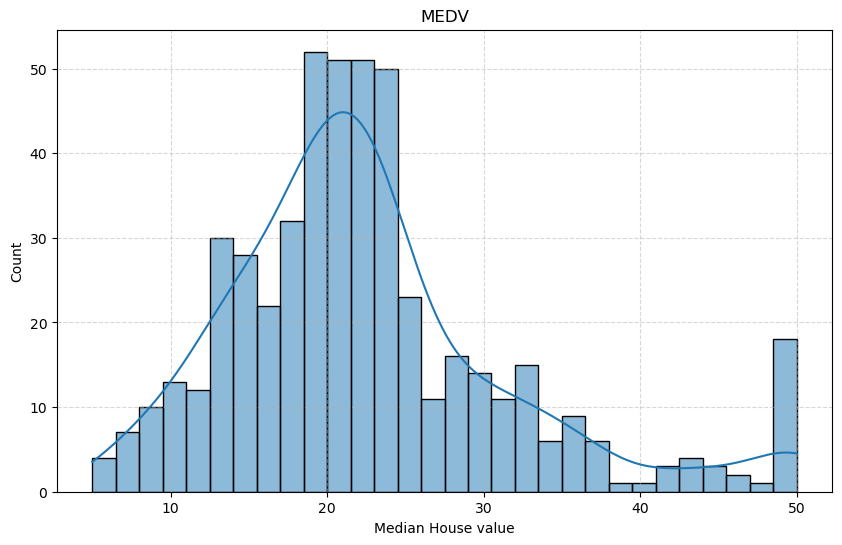

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title("MEDV")
plt.xlabel("Median House value")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

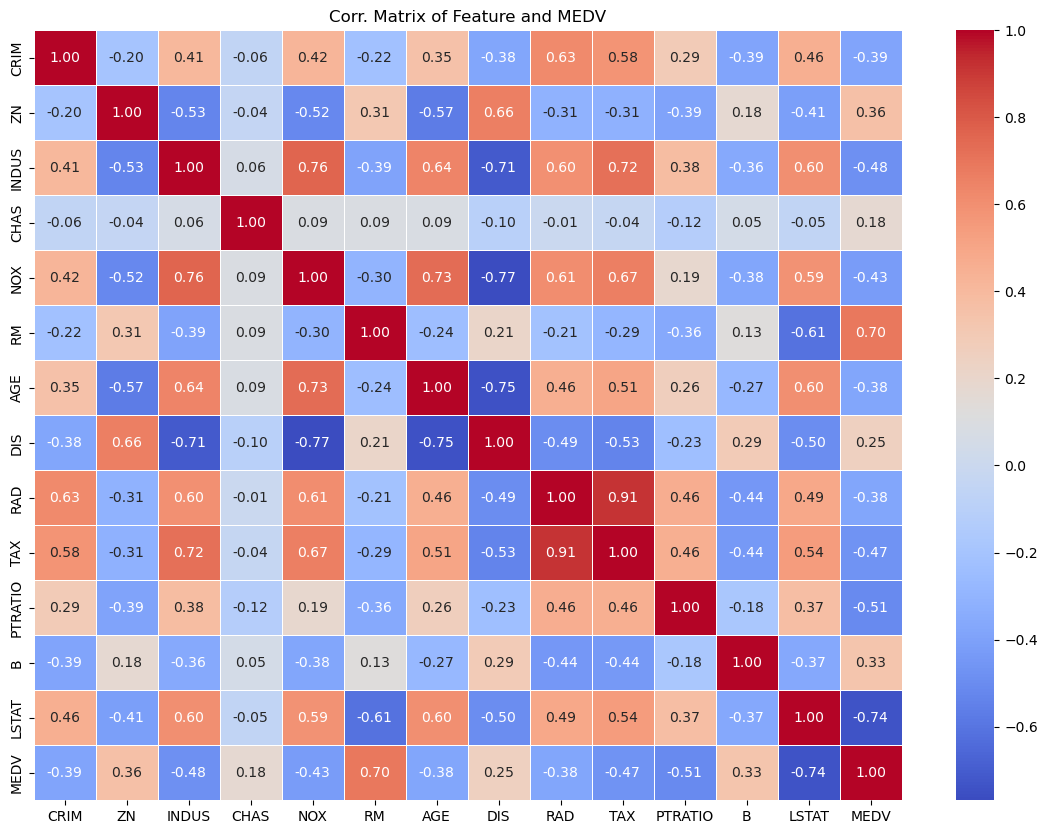

In [8]:
plt.figure(figsize=(14,10))
corr_matrix =df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Corr. Matrix of Feature and MEDV")
plt.show()

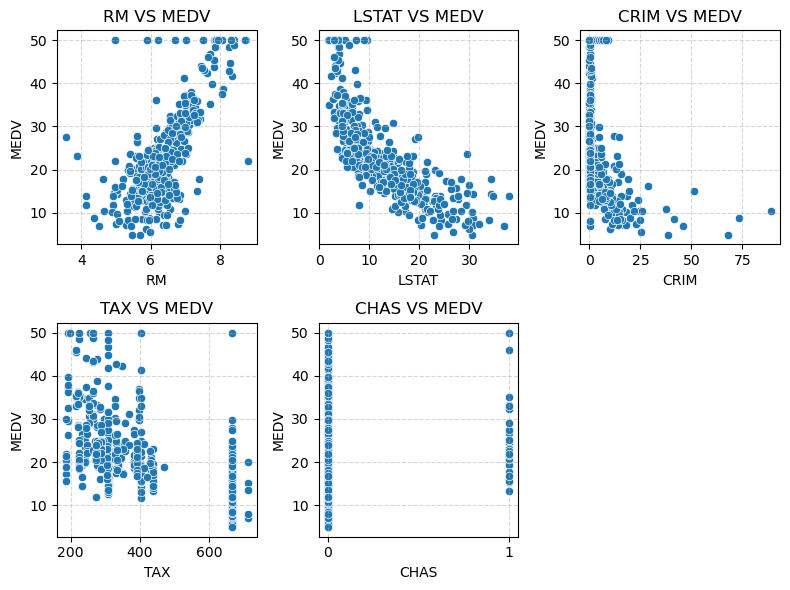

In [9]:
from matplotlib.lines import lineStyles
features_to_plot = ['RM','LSTAT','CRIM','TAX','CHAS']
plt.figure(figsize=(8,6))
for i, col in enumerate(features_to_plot):
  plt.subplot(2,3,i+1)
  sns.scatterplot(x=df[col], y=df['MEDV'])
  plt.title(f"{col} VS MEDV")
  plt.xlabel(col)
  plt.ylabel('MEDV')
  plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
#特徵與標籤分離
X = df.drop('MEDV', axis=1)
y = df['MEDV']
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [11]:
#特徵正規化(0-1) 標準化(平均值:0，標準差:1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# print(X[:1])
# print(X_scaled[:5])
#特徵轉為DataFrame
X_preprcoessd_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
#訓練/測試資料切割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprcoessd_df, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,root_mean_squared_error
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\n--- Random Forest Regressor 模型評估")
print(f"mean_squared_error:{mse_rf:.2f}")
print(f"root_mean_squared_error:{rmse_rf:.2f}")
print(f"mean_absolute_error:{mae_rf:.2f}")
print(f"r2_score:{r2_rf:.2f}")


--- Random Forest Regressor 模型評估
mean_squared_error:7.93
root_mean_squared_error:2.82
mean_absolute_error:2.05
r2_score:0.89
